In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
data=pd.read_csv('data.csv')
columns_name_p2p=['cn2cahome','cn2ca','cn2jp','ca2jp','ca2cahome','jp2cahome','home2ca','home2cn','home2jp','home2cahome']
columns_name_type=['Loss_Rate','RTT_Min','RTT_Max','RTT_Avg','RTT_stddev','stddev/Avg','Distance(est)(km)','Avg/Distance','Number_of_Hops']

In [3]:
def listsum(l):
    s=0
    for i in l:
        if i=='' or i==float('NaN'):
            continue
        s+=float(i)
    return s

In [4]:
def hour(row):
    
    utc=row['time+0(UTC)']
    if len(utc)!=12:
        return -1
    return int(utc[8:10])
data['hour(UTC)']=data.apply(hour, axis=1)
def dates(row):
    utc=row['time+0(UTC)']
    if len(utc)!=12:
        return '-1'
    return utc[4:8]
data['date(UTC)']=data.apply(dates, axis=1)

In [5]:
dates=['1022','1023','1024','1025','1026','1027','1028','1029','1030'
      ,'1031','1101','1102','1103','1104','1105','1106']
date_min=[]
date_avg=[]
date_max=[]
date_stddev=[]
date_loss_rate=[]
date_numbers_of_hops=[]
k=-1
for j in columns_name_p2p:
    k+=1
    date_min.append([])
    date_avg.append([])
    date_max.append([])
    date_stddev.append([])
    date_loss_rate.append([])
    date_numbers_of_hops.append([])
    for i in dates:
        #print(i,j)
        date_min[k].append(listsum(data[data['date(UTC)']==i][pd.notnull(data[j+'_RTT_Min'])][j+'_RTT_Min'])/(1+len(data[data['date(UTC)']==i][pd.notnull(data[j+'_RTT_Min'])])))
        date_avg[k].append(listsum(data[data['date(UTC)']==i][pd.notnull(data[j+'_RTT_Avg'])][j+'_RTT_Avg'])/(1+len(data[data['date(UTC)']==i][pd.notnull(data[j+'_RTT_Avg'])])))
        date_max[k].append(listsum(data[data['date(UTC)']==i][pd.notnull(data[j+'_RTT_Max'])][j+'_RTT_Max'])/(1+len(data[data['date(UTC)']==i][pd.notnull(data[j+'_RTT_Max'])])))
        date_stddev[k].append(listsum(data[data['date(UTC)']==i][pd.notnull(data[j+'_RTT_stddev'])][j+'_RTT_stddev'])/(1+len(data[data['date(UTC)']==i][pd.notnull(data[j+'_RTT_stddev'])])))
        date_loss_rate[k].append(listsum(data[data['date(UTC)']==i][pd.notnull(data[j+'_Loss_Rate'])][j+'_Loss_Rate'])/(1+len(data[data['date(UTC)']==i][pd.notnull(data[j+'_Loss_Rate'])])))
        if j=='home2cn':
            date_numbers_of_hops[k].append([])
            continue
        date_numbers_of_hops[k].append(listsum(data[data['date(UTC)']==i][pd.notnull(data[j+'_Number_of_Hops'])][j+'_Number_of_Hops'])/(1+len(data[data['date(UTC)']==i][pd.notnull(data[j+'_Number_of_Hops'])])))



<ipython-input-5-1098d8281c3d>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  date_min[k].append(listsum(data[data['date(UTC)']==i][pd.notnull(data[j+'_RTT_Min'])][j+'_RTT_Min'])/(1+len(data[data['date(UTC)']==i][pd.notnull(data[j+'_RTT_Min'])])))
<ipython-input-5-1098d8281c3d>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  date_avg[k].append(listsum(data[data['date(UTC)']==i][pd.notnull(data[j+'_RTT_Avg'])][j+'_RTT_Avg'])/(1+len(data[data['date(UTC)']==i][pd.notnull(data[j+'_RTT_Avg'])])))
<ipython-input-5-1098d8281c3d>:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  date_max[k].append(listsum(data[data['date(UTC)']==i][pd.notnull(data[j+'_RTT_Max'])][j+'_RTT_Max'])/(1+len(data[data['date(UTC)']==i][pd.notnull(data[j+'_RTT_Max'])])))
<ipython-input-5-1098d8281c3d>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  date_stddev[k].append(listsum(data[dat

In [6]:
hours=range(24)
hour_min=[]
hour_avg=[]
hour_max=[]
hour_stddev=[]
hour_loss_rate=[]
hour_numbers_of_hops=[]
k=-1
for j in columns_name_p2p:
    k+=1
    hour_min.append([])
    hour_avg.append([])
    hour_max.append([])
    hour_stddev.append([])
    hour_loss_rate.append([])
    hour_numbers_of_hops.append([])
    for i in hours:
        hour_min[k].append(listsum(data[data['hour(UTC)']==i][pd.notnull(data[j+'_RTT_Min'])][j+'_RTT_Min'])/len(data[data['hour(UTC)']==i][pd.notnull(data[j+'_RTT_Min'])]))
        hour_avg[k].append(listsum(data[data['hour(UTC)']==i][pd.notnull(data[j+'_RTT_Avg'])][j+'_RTT_Avg'])/len(data[data['hour(UTC)']==i][pd.notnull(data[j+'_RTT_Avg'])]))
        hour_max[k].append(listsum(data[data['hour(UTC)']==i][pd.notnull(data[j+'_RTT_Max'])][j+'_RTT_Max'])/len(data[data['hour(UTC)']==i][pd.notnull(data[j+'_RTT_Max'])]))
        hour_stddev[k].append(listsum(data[data['hour(UTC)']==i][pd.notnull(data[j+'_RTT_stddev'])][j+'_RTT_stddev'])/len(data[data['hour(UTC)']==i][pd.notnull(data[j+'_RTT_stddev'])]))
        hour_loss_rate[k].append(listsum(data[data['hour(UTC)']==i][pd.notnull(data[j+'_Loss_Rate'])][j+'_Loss_Rate'])/len(data[data['hour(UTC)']==i][pd.notnull(data[j+'_Loss_Rate'])]))
        if j=='home2cn':
            hour_numbers_of_hops[k].append([])
            continue
        hour_numbers_of_hops[k].append(listsum(data[data['hour(UTC)']==i][pd.notnull(data[j+'_Number_of_Hops'])][j+'_Number_of_Hops'])/(len(data[data['hour(UTC)']==i][pd.notnull(data[j+'_Number_of_Hops'])]))+1)


<ipython-input-6-aaf546433491>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hour_min[k].append(listsum(data[data['hour(UTC)']==i][pd.notnull(data[j+'_RTT_Min'])][j+'_RTT_Min'])/len(data[data['hour(UTC)']==i][pd.notnull(data[j+'_RTT_Min'])]))
<ipython-input-6-aaf546433491>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hour_avg[k].append(listsum(data[data['hour(UTC)']==i][pd.notnull(data[j+'_RTT_Avg'])][j+'_RTT_Avg'])/len(data[data['hour(UTC)']==i][pd.notnull(data[j+'_RTT_Avg'])]))
<ipython-input-6-aaf546433491>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hour_max[k].append(listsum(data[data['hour(UTC)']==i][pd.notnull(data[j+'_RTT_Max'])][j+'_RTT_Max'])/len(data[data['hour(UTC)']==i][pd.notnull(data[j+'_RTT_Max'])]))
<ipython-input-6-aaf546433491>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hour_stddev[k].append(listsum(data[data['hour(UTC)

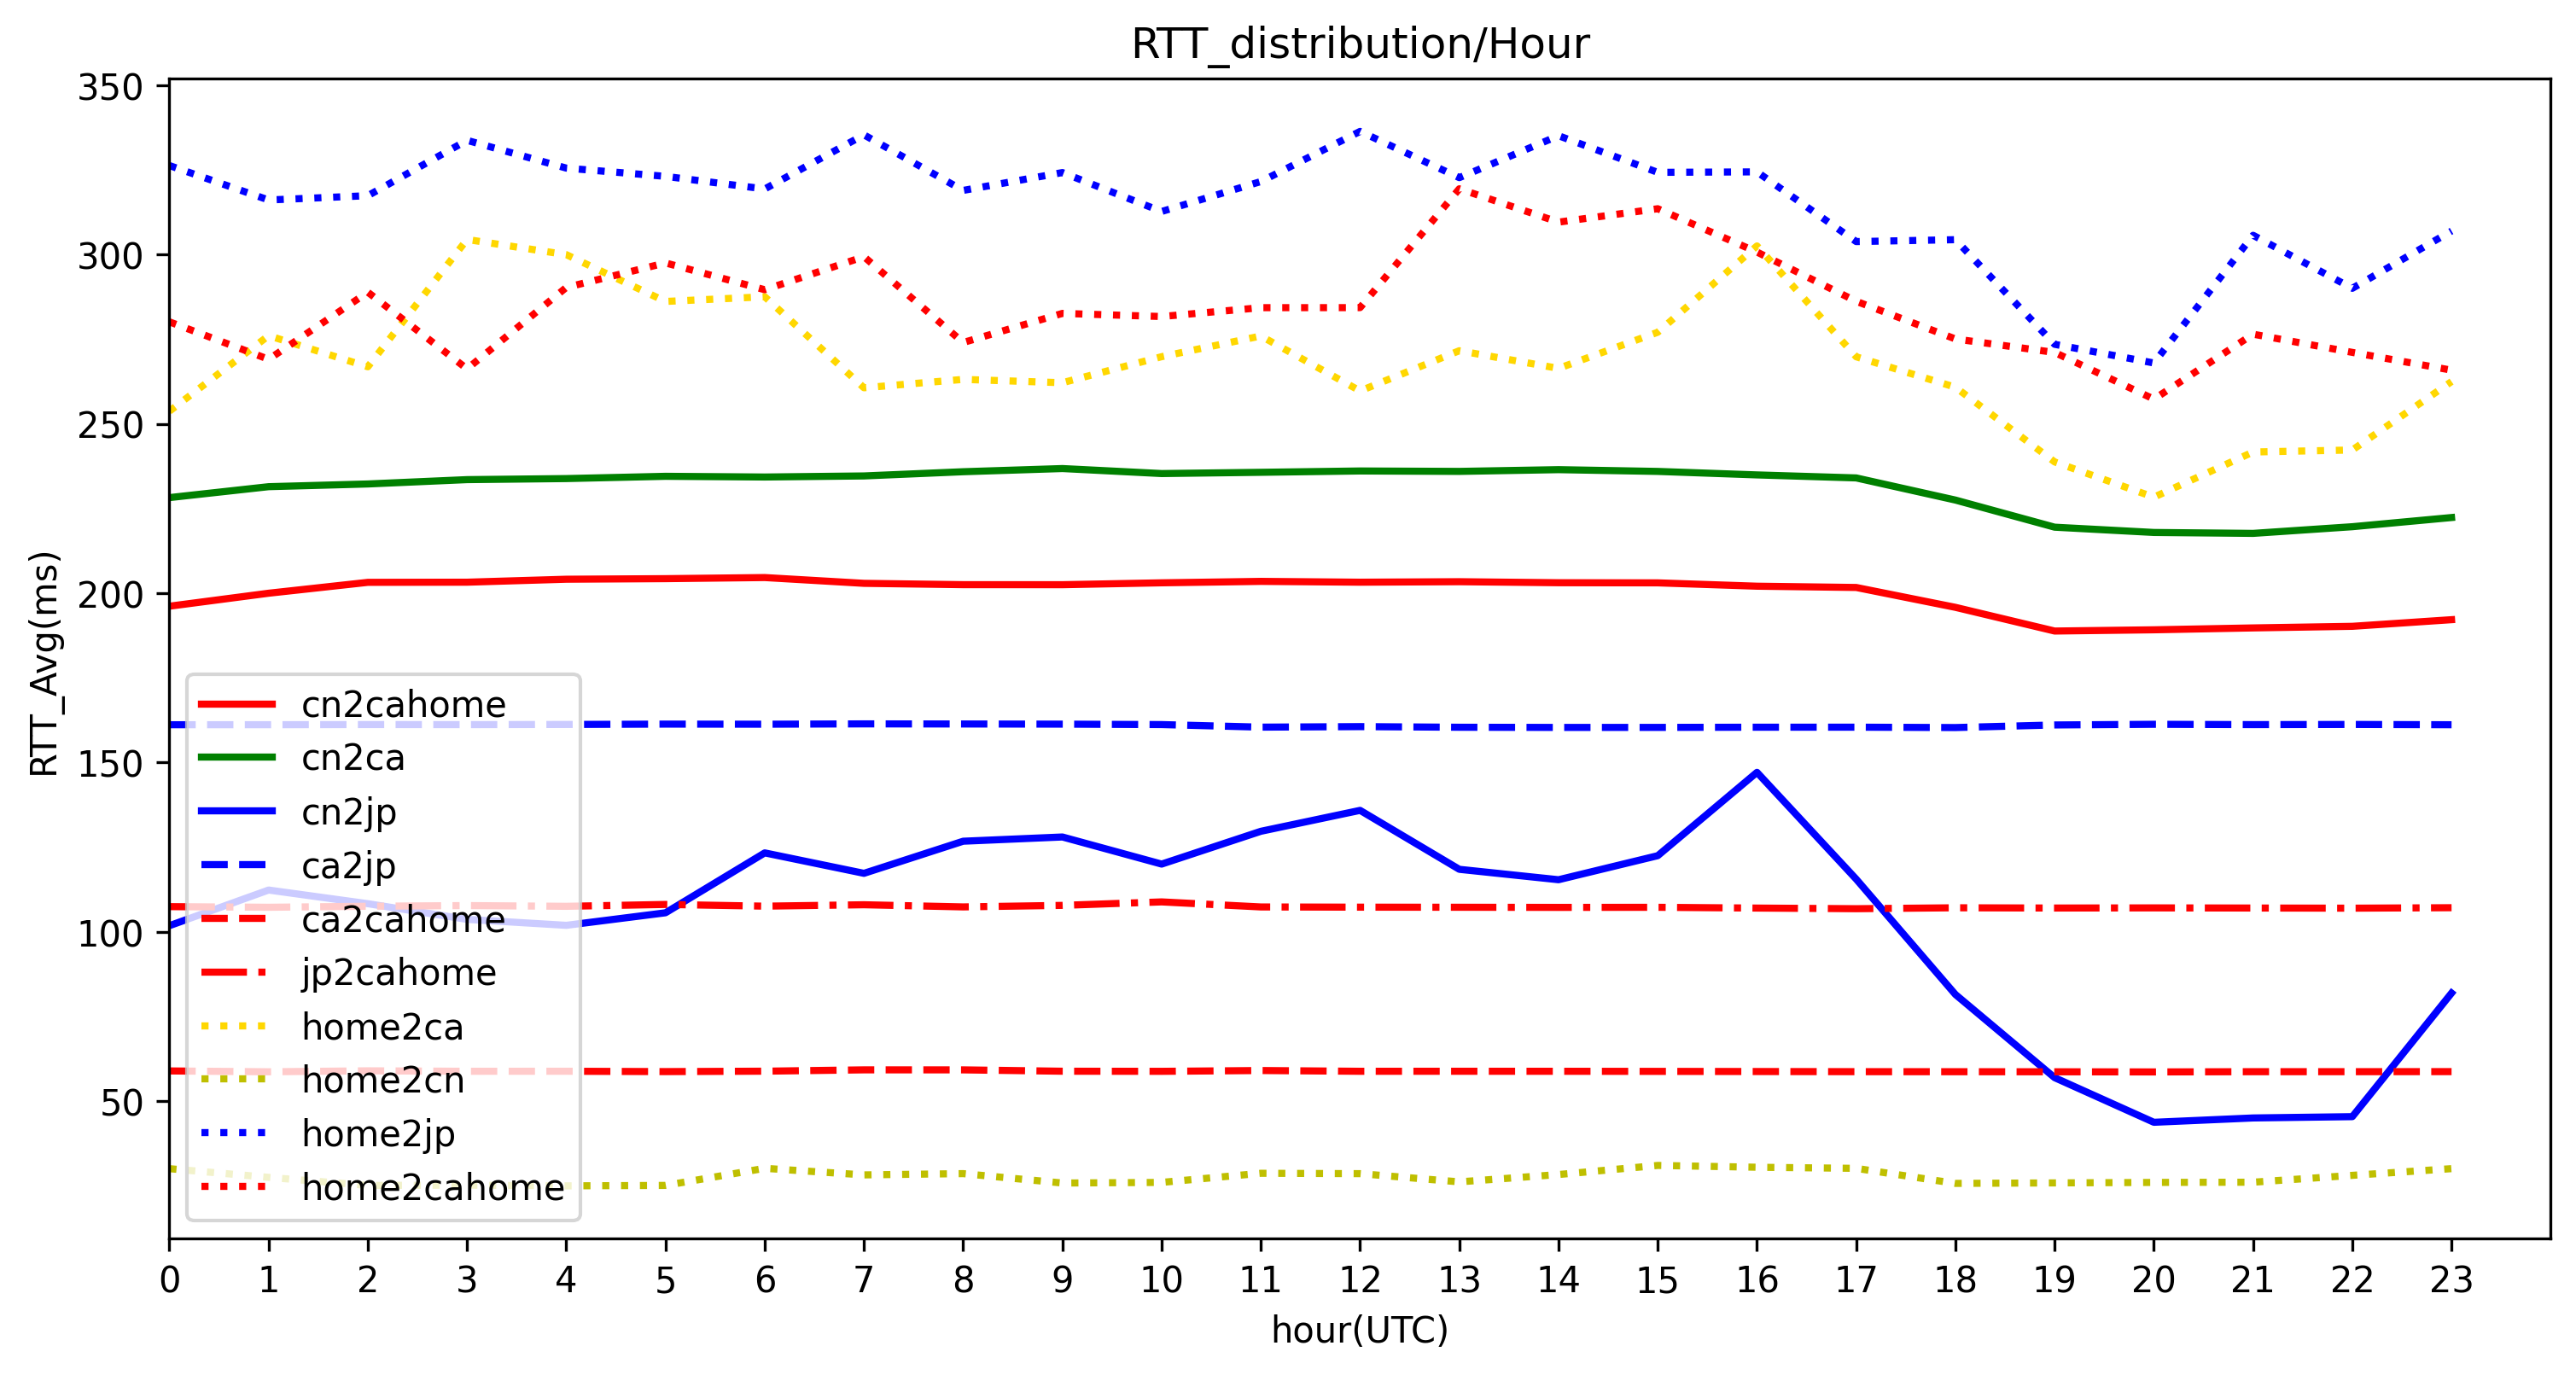

<Figure size 432x288 with 0 Axes>

In [7]:
cs=['r','g','b','b','r','r','#FFD700','y','b','r']
lss=['-','-','-','--','--','-.',':',':',':',':']
fig = plt.figure(figsize=(12, 6), dpi=300)
for i in range(len(columns_name_p2p)):
    plt.plot(hours,hour_avg[i], label=columns_name_p2p[i],c=cs[i],ls=lss[i],lw=2)
plt.legend(loc=3)
plt.xlim((0, 24))
plt.xticks(range(24))
plt.xlabel('hour(UTC)')
plt.ylabel('RTT_Avg(ms)')
plt.title('RTT_distribution/Hour')
plt.show()
plt.savefig('RTT_distribution_Hour.png')

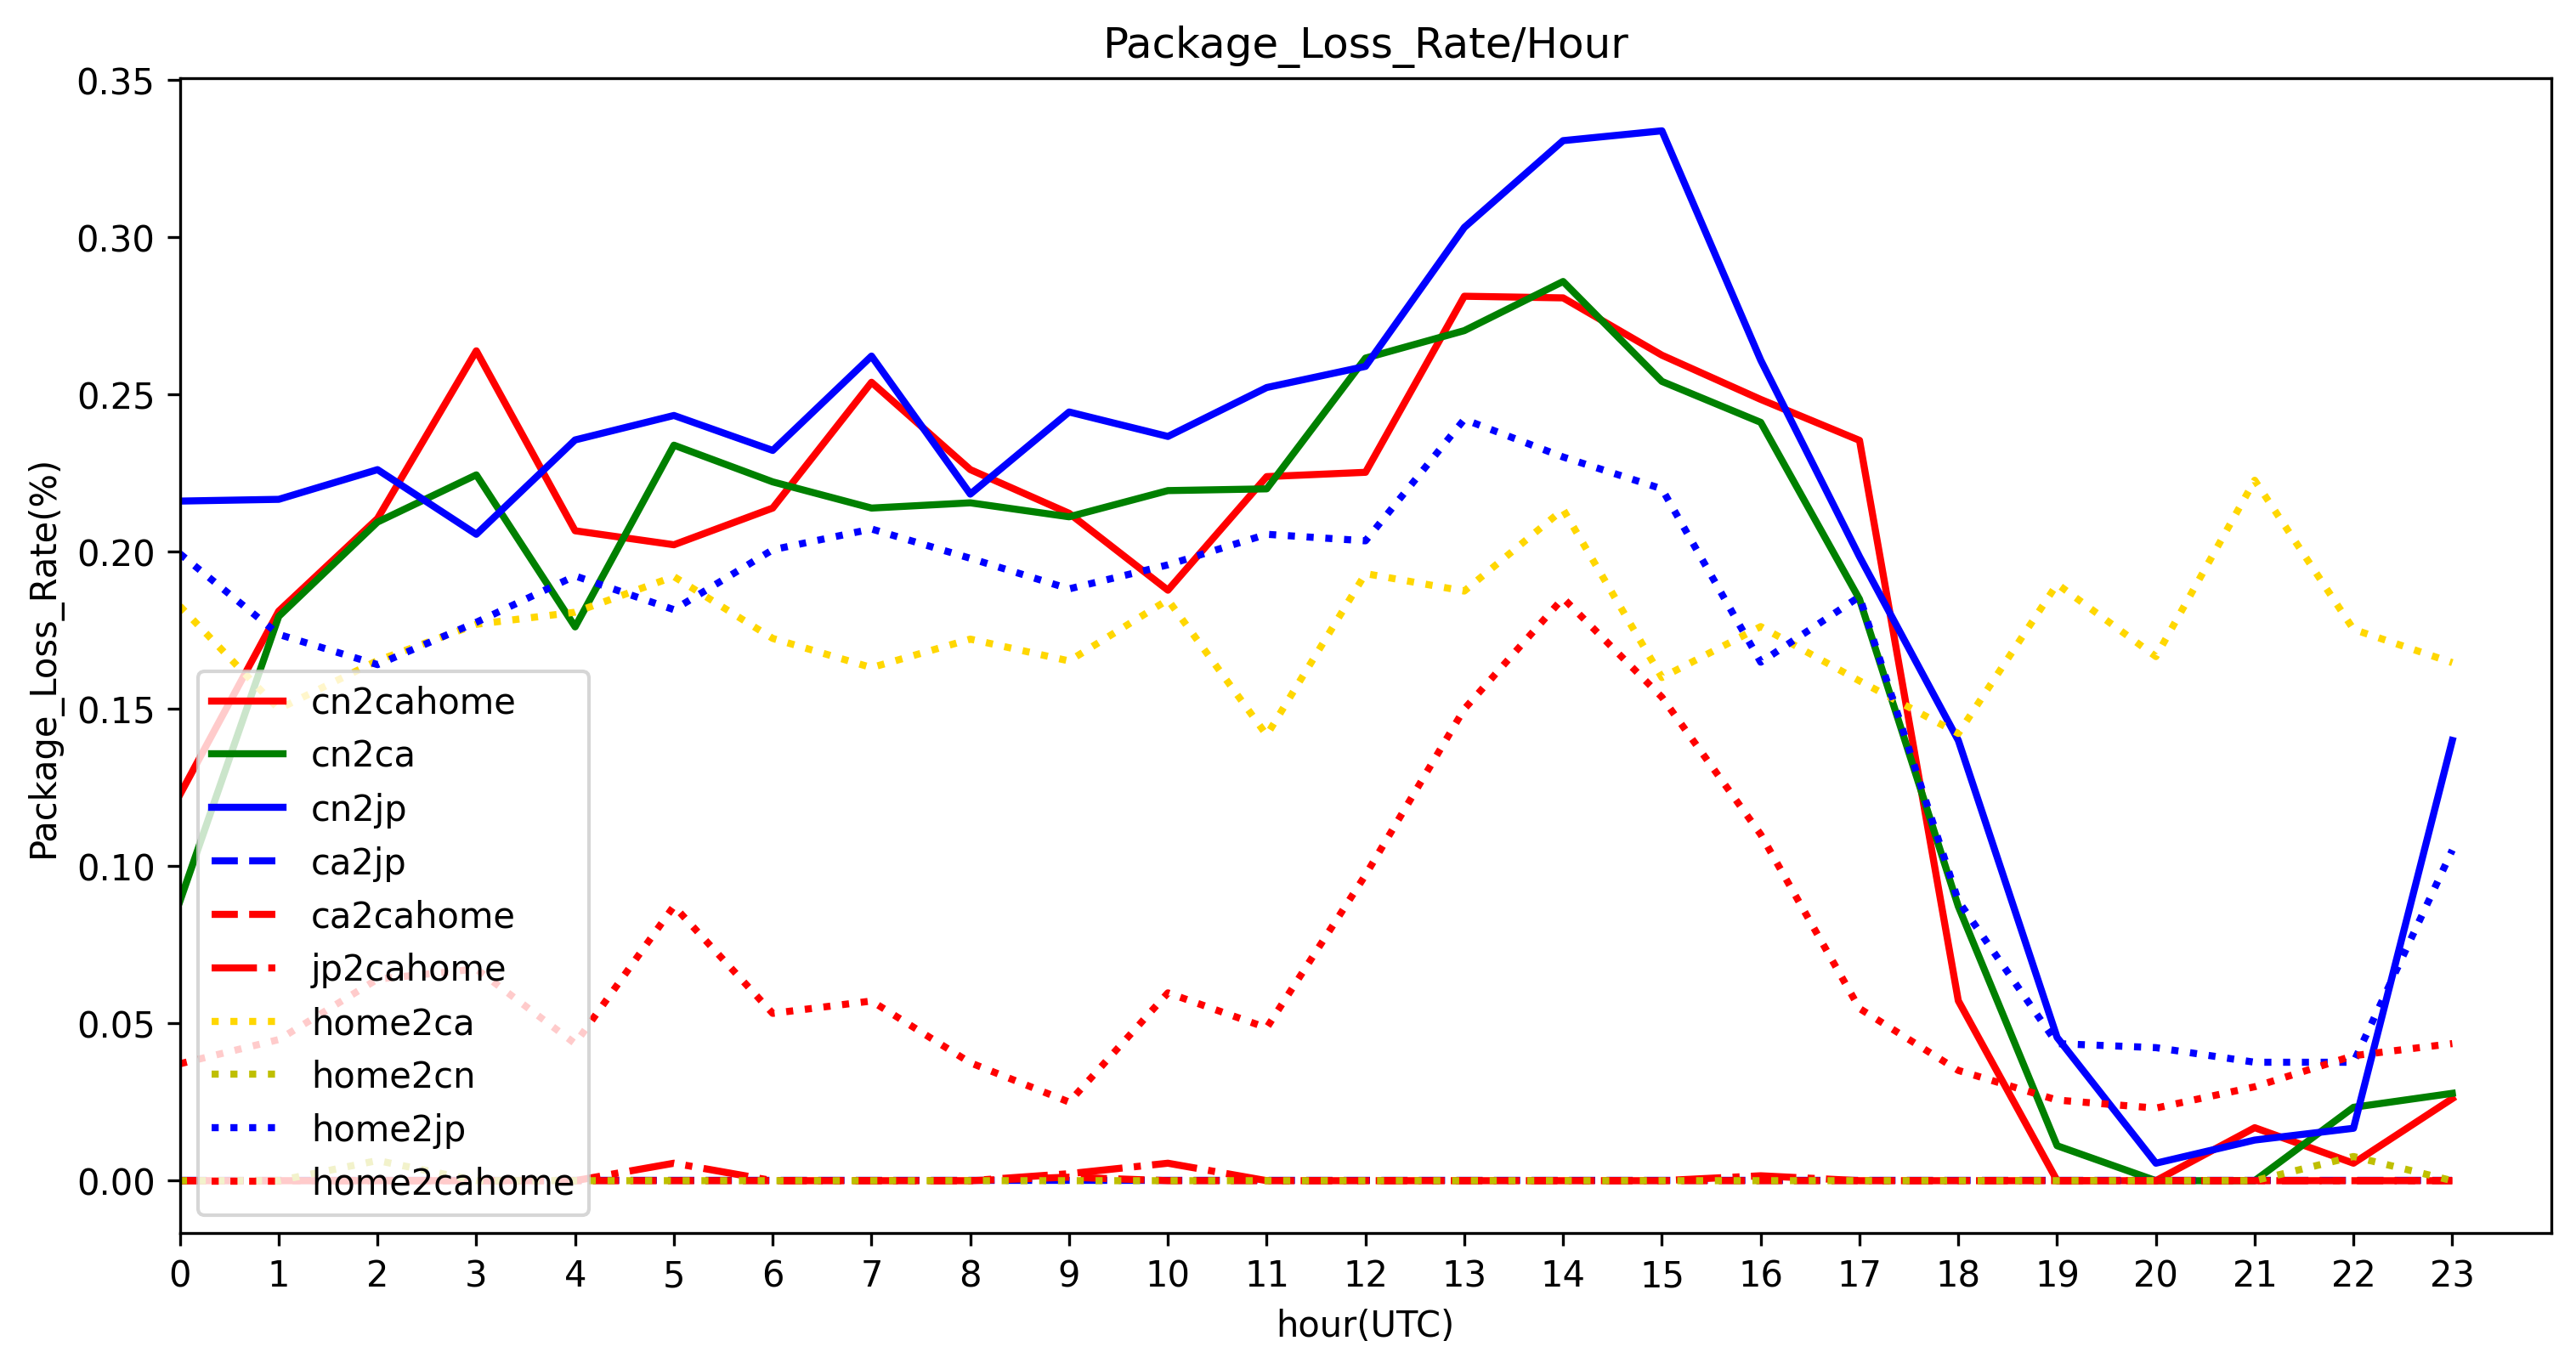

<Figure size 432x288 with 0 Axes>

In [8]:
cs=['r','g','b','b','r','r','#FFD700','y','b','r']
lss=['-','-','-','--','--','-.',':',':',':',':']
fig = plt.figure(figsize=(12, 6), dpi=300)
for i in range(len(columns_name_p2p)):
    plt.plot(hours,hour_loss_rate[i], label=columns_name_p2p[i],c=cs[i],ls=lss[i],lw=2)
plt.legend(loc=3)
plt.xlim((0, 24))
plt.xticks(range(24))
plt.xlabel('hour(UTC)')
plt.ylabel('Package_Loss_Rate(%)')
plt.title('Package_Loss_Rate/Hour')
plt.show()
plt.savefig('Package_Loss_Rate_Hour.png')

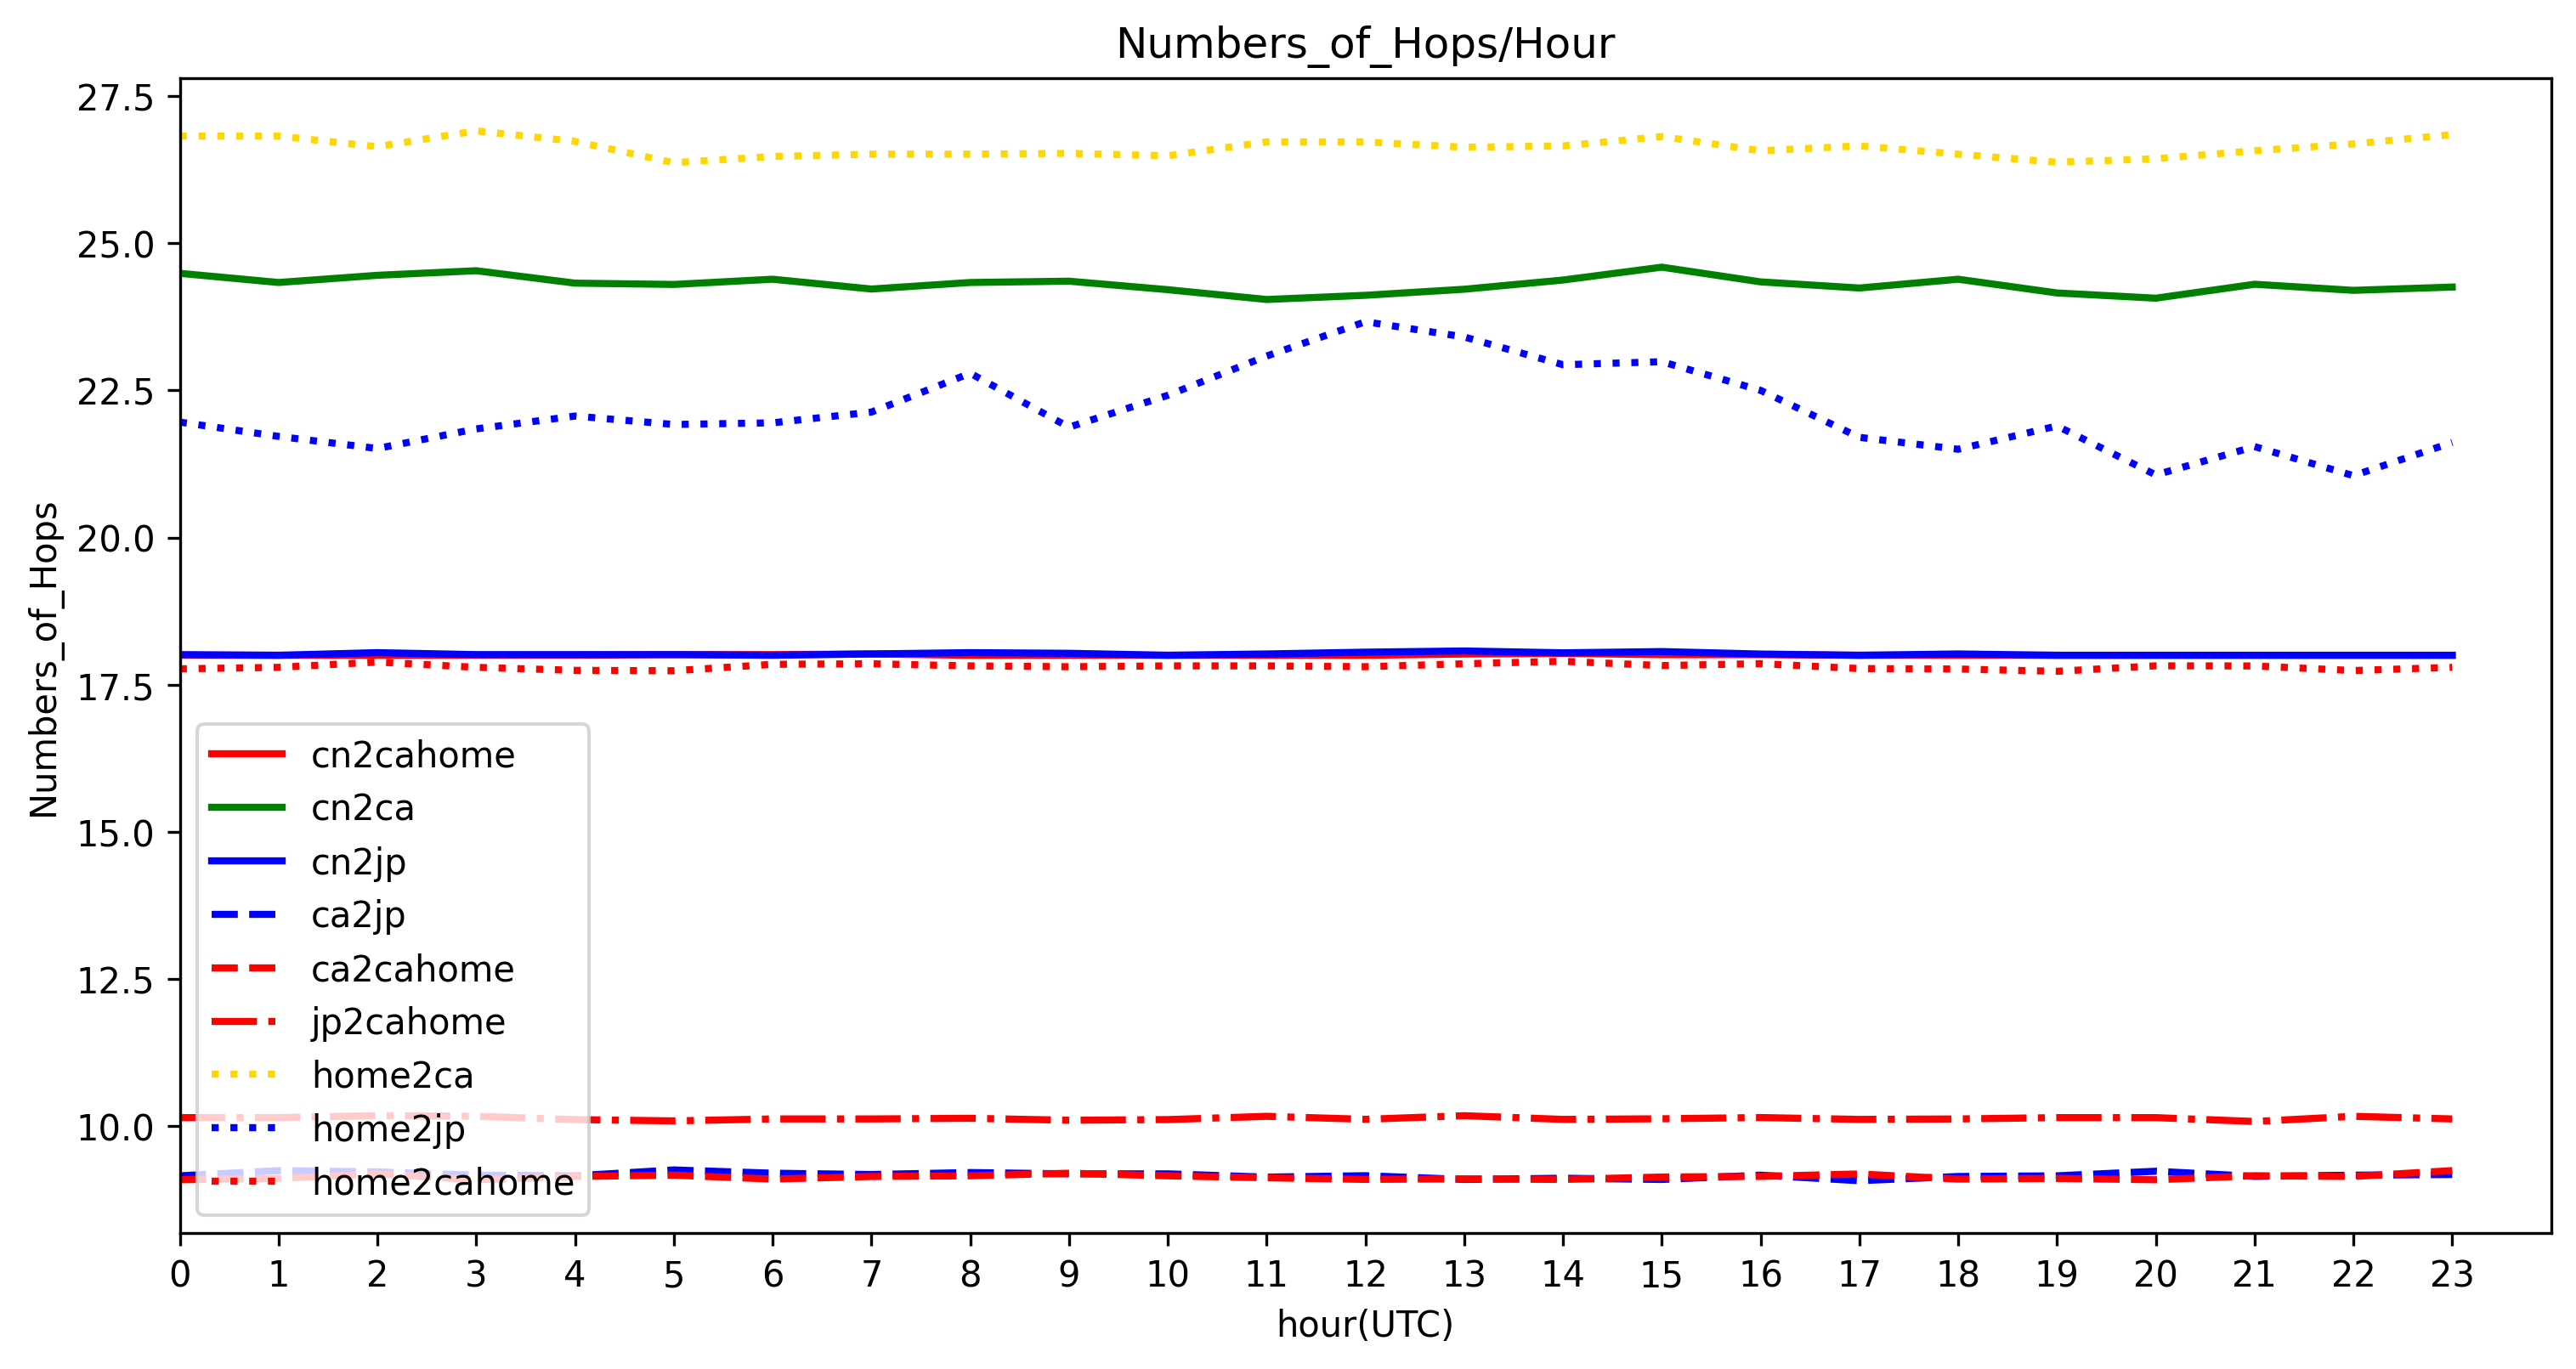

<Figure size 432x288 with 0 Axes>

In [9]:
cs=['r','g','b','b','r','r','#FFD700','y','b','r']
lss=['-','-','-','--','--','-.',':',':',':',':']
fig = plt.figure(figsize=(12, 6), dpi=300)
for i in range(len(columns_name_p2p)):
    if i==7 :continue 
    plt.plot(hours,hour_numbers_of_hops[i], label=columns_name_p2p[i],c=cs[i],ls=lss[i],lw=2)
plt.legend(loc=3)
plt.xlim((0, 24))
plt.xticks(range(24))
plt.xlabel('hour(UTC)')
plt.ylabel('Numbers_of_Hops')
plt.title('Numbers_of_Hops/Hour')
plt.show()
plt.savefig('Numbers_of_Hops_Hour.png')

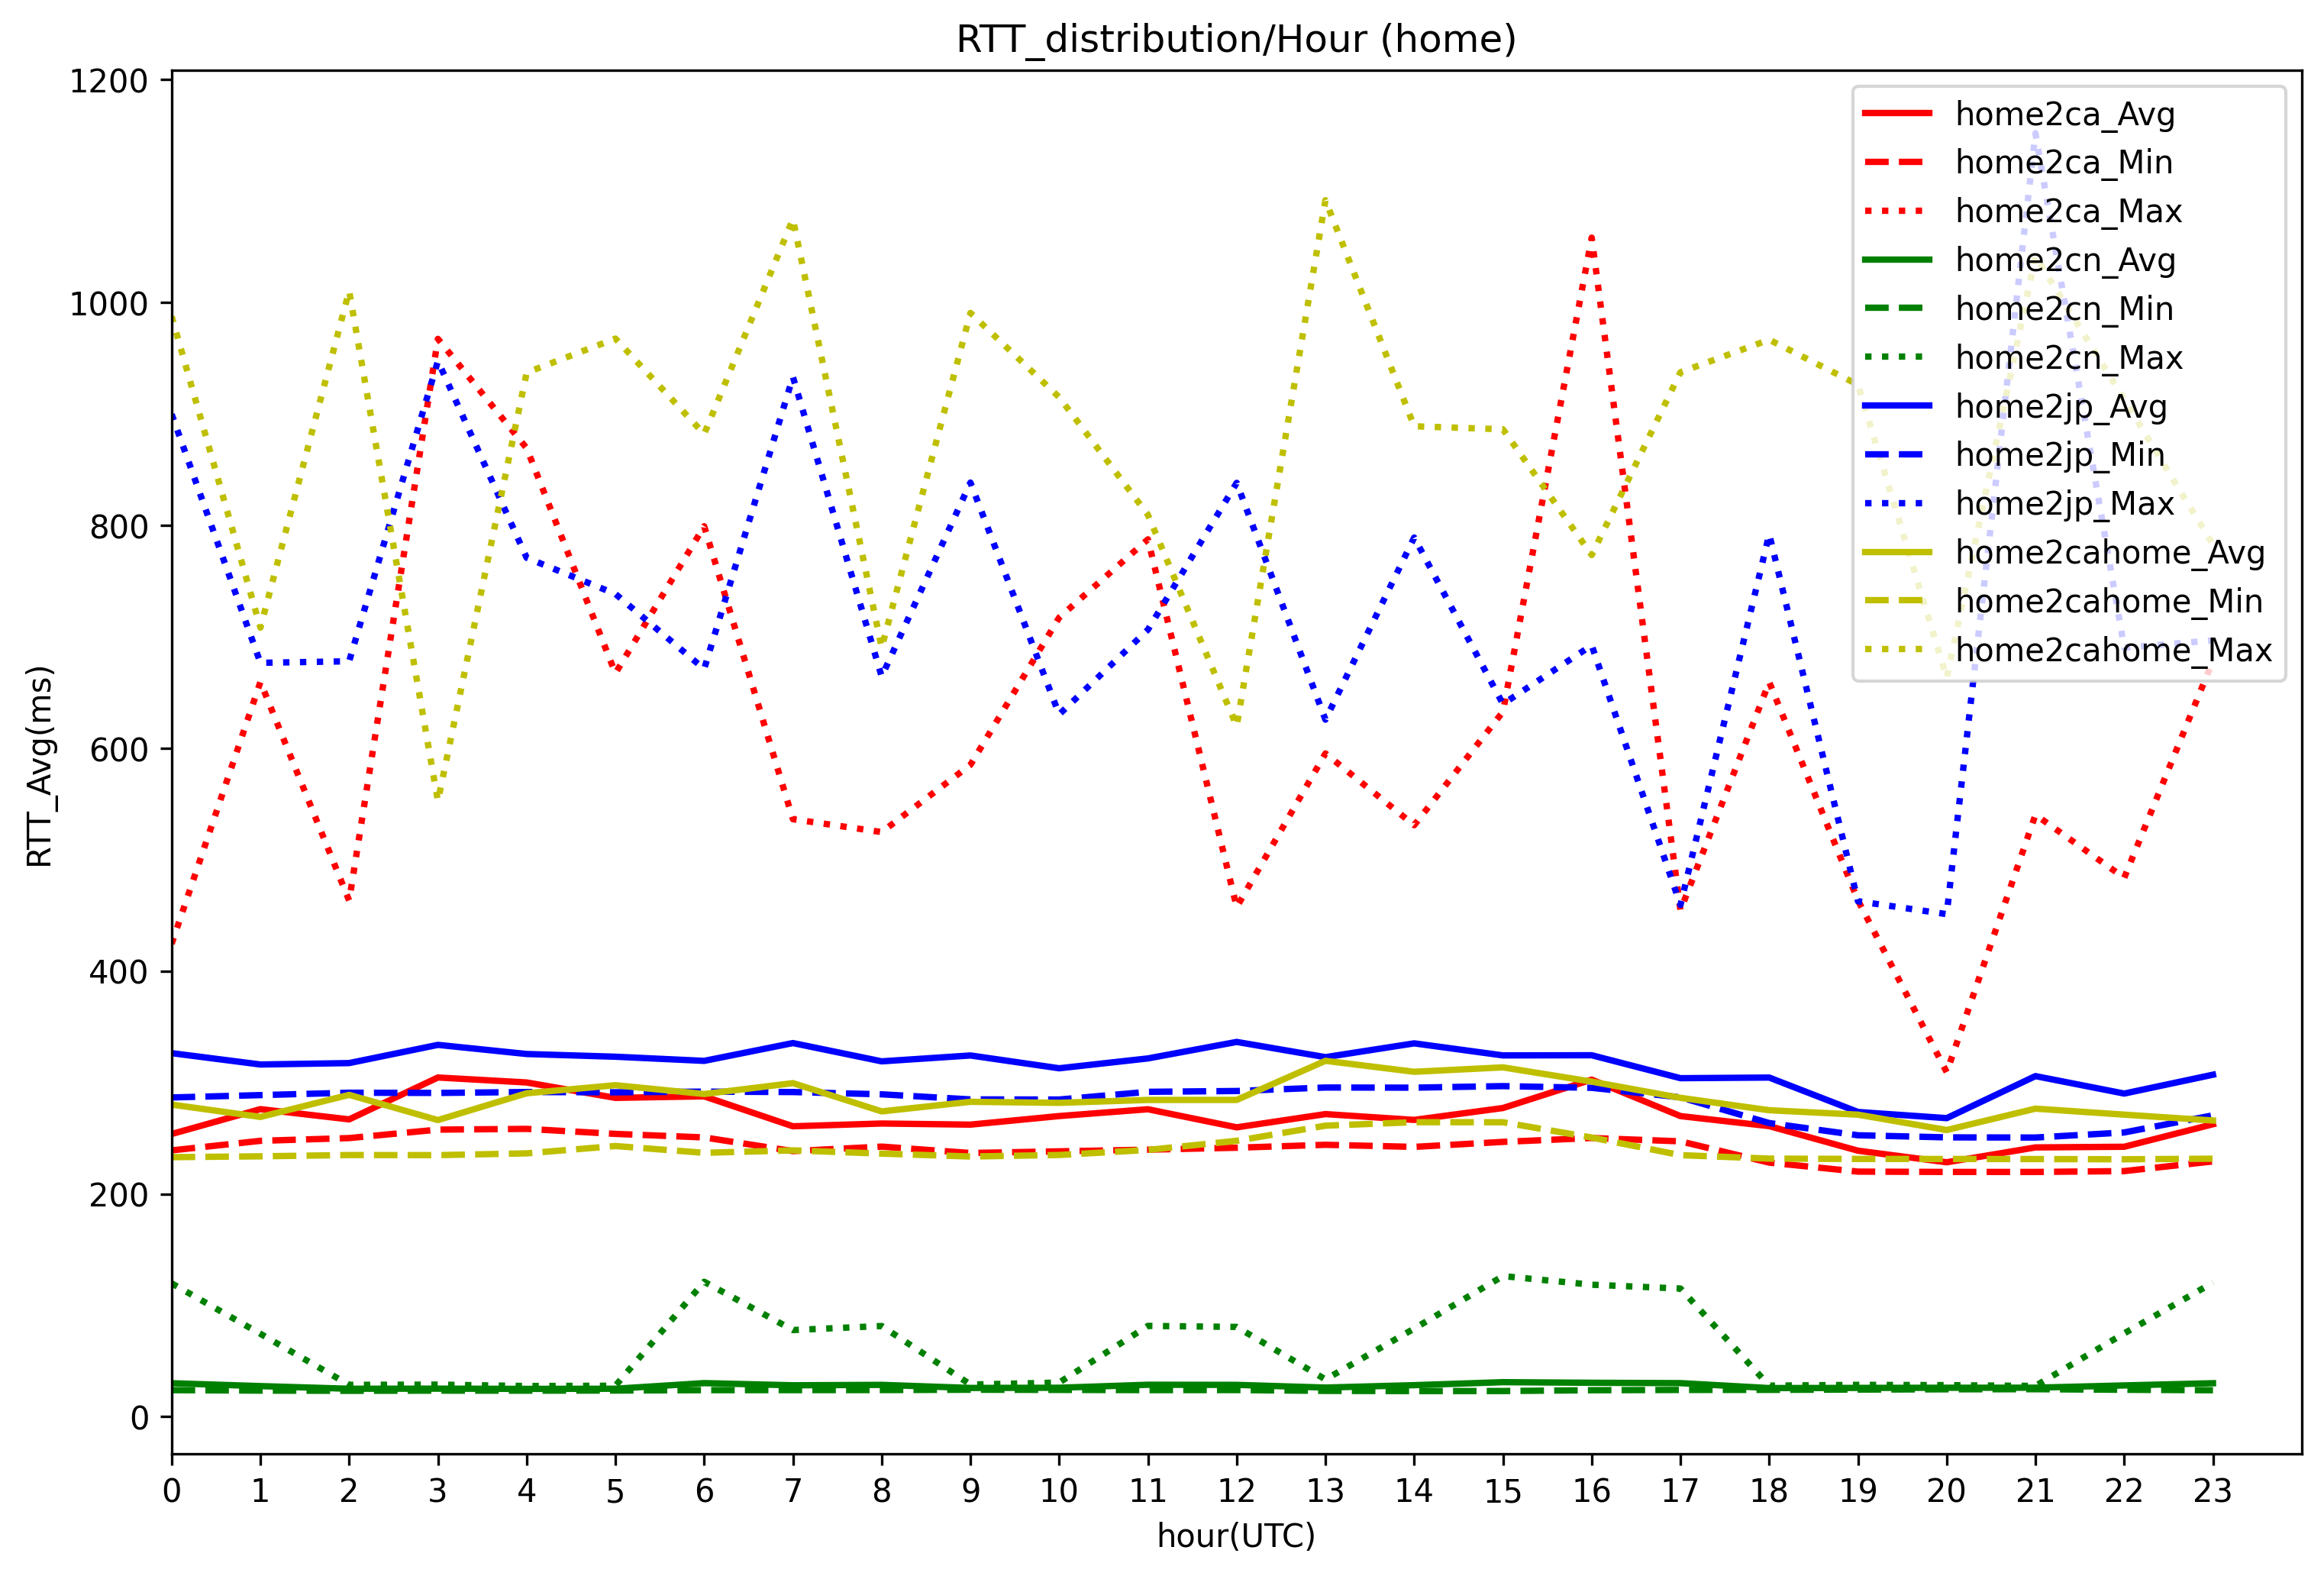

<Figure size 432x288 with 0 Axes>

In [10]:
cs=['r','r','r','g','g','g','b','b','b','y','y','y']
lss=['--','-',':','--','-',':','--','-',':','--','-',':']
fig = plt.figure(figsize=(12, 8), dpi=300)
for i in range(len(columns_name_p2p[-4:])):
    plt.plot(hours,hour_avg[i+6], label=columns_name_p2p[i+6]+'_Avg',c=cs[i*3+1],ls=lss[i*3+1],lw=2)
    plt.plot(hours,hour_min[i+6], label=columns_name_p2p[i+6]+'_Min',c=cs[i*3+0],ls=lss[i*3+0],lw=2)
    plt.plot(hours,hour_max[i+6], label=columns_name_p2p[i+6]+'_Max',c=cs[i*3+2],ls=lss[i*3+2],lw=2)
plt.legend(loc=1)
plt.xlim((0, 24))
plt.xticks(range(24))
plt.xlabel('hour(UTC)')
plt.ylabel('RTT_Avg(ms)')
plt.title('RTT_distribution/Hour (home)')
plt.show()
plt.savefig('RTT_distribution_Hour (home).png')

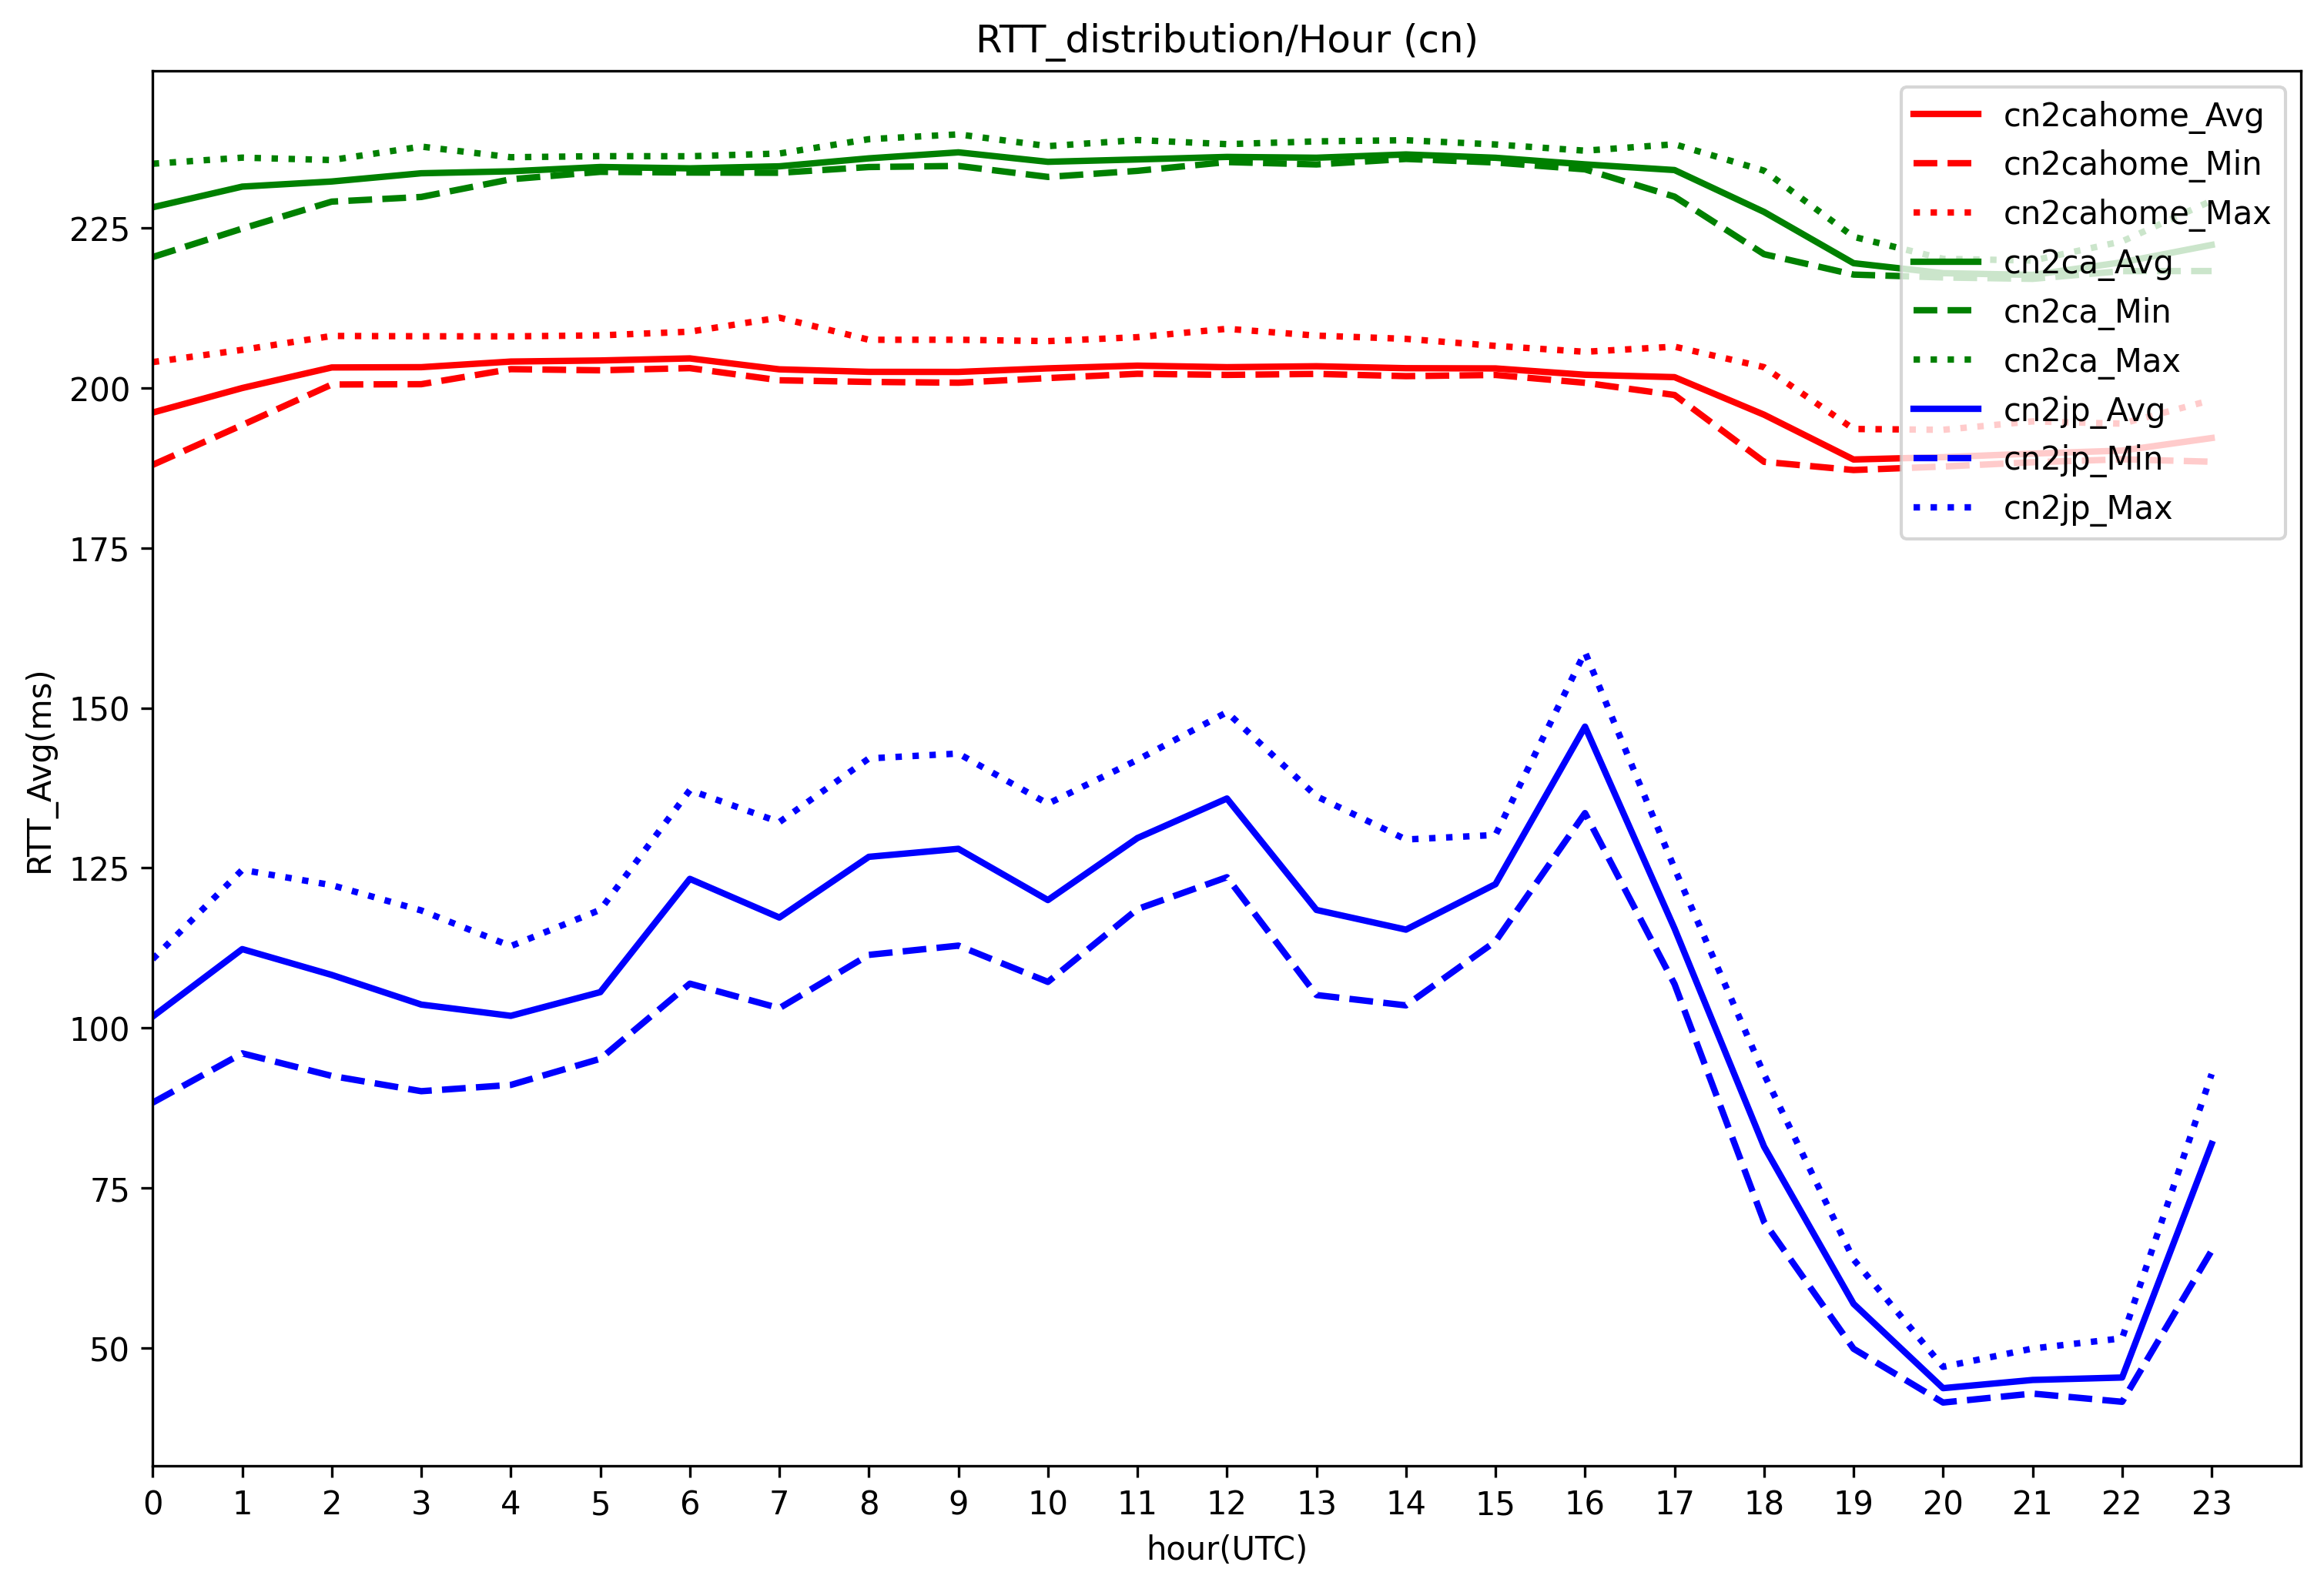

<Figure size 432x288 with 0 Axes>

In [11]:
cs=['r','r','r','g','g','g','b','b','b']
lss=['--','-',':','--','-',':','--','-',':']
fig = plt.figure(figsize=(12, 8), dpi=300)
for i in range(len(columns_name_p2p[:3])):
    plt.plot(hours,hour_avg[i], label=columns_name_p2p[i]+'_Avg',c=cs[i*3+1],ls=lss[i*3+1],lw=2)
    plt.plot(hours,hour_min[i], label=columns_name_p2p[i]+'_Min',c=cs[i*3+0],ls=lss[i*3+0],lw=2)
    plt.plot(hours,hour_max[i], label=columns_name_p2p[i]+'_Max',c=cs[i*3+2],ls=lss[i*3+2],lw=2)
plt.legend(loc=1)
plt.xlim((0, 24))
plt.xticks(range(24))
plt.xlabel('hour(UTC)')
plt.ylabel('RTT_Avg(ms)')
plt.title('RTT_distribution/Hour (cn)')
plt.show()
plt.savefig('RTT_distribution_Hour (cn).png')


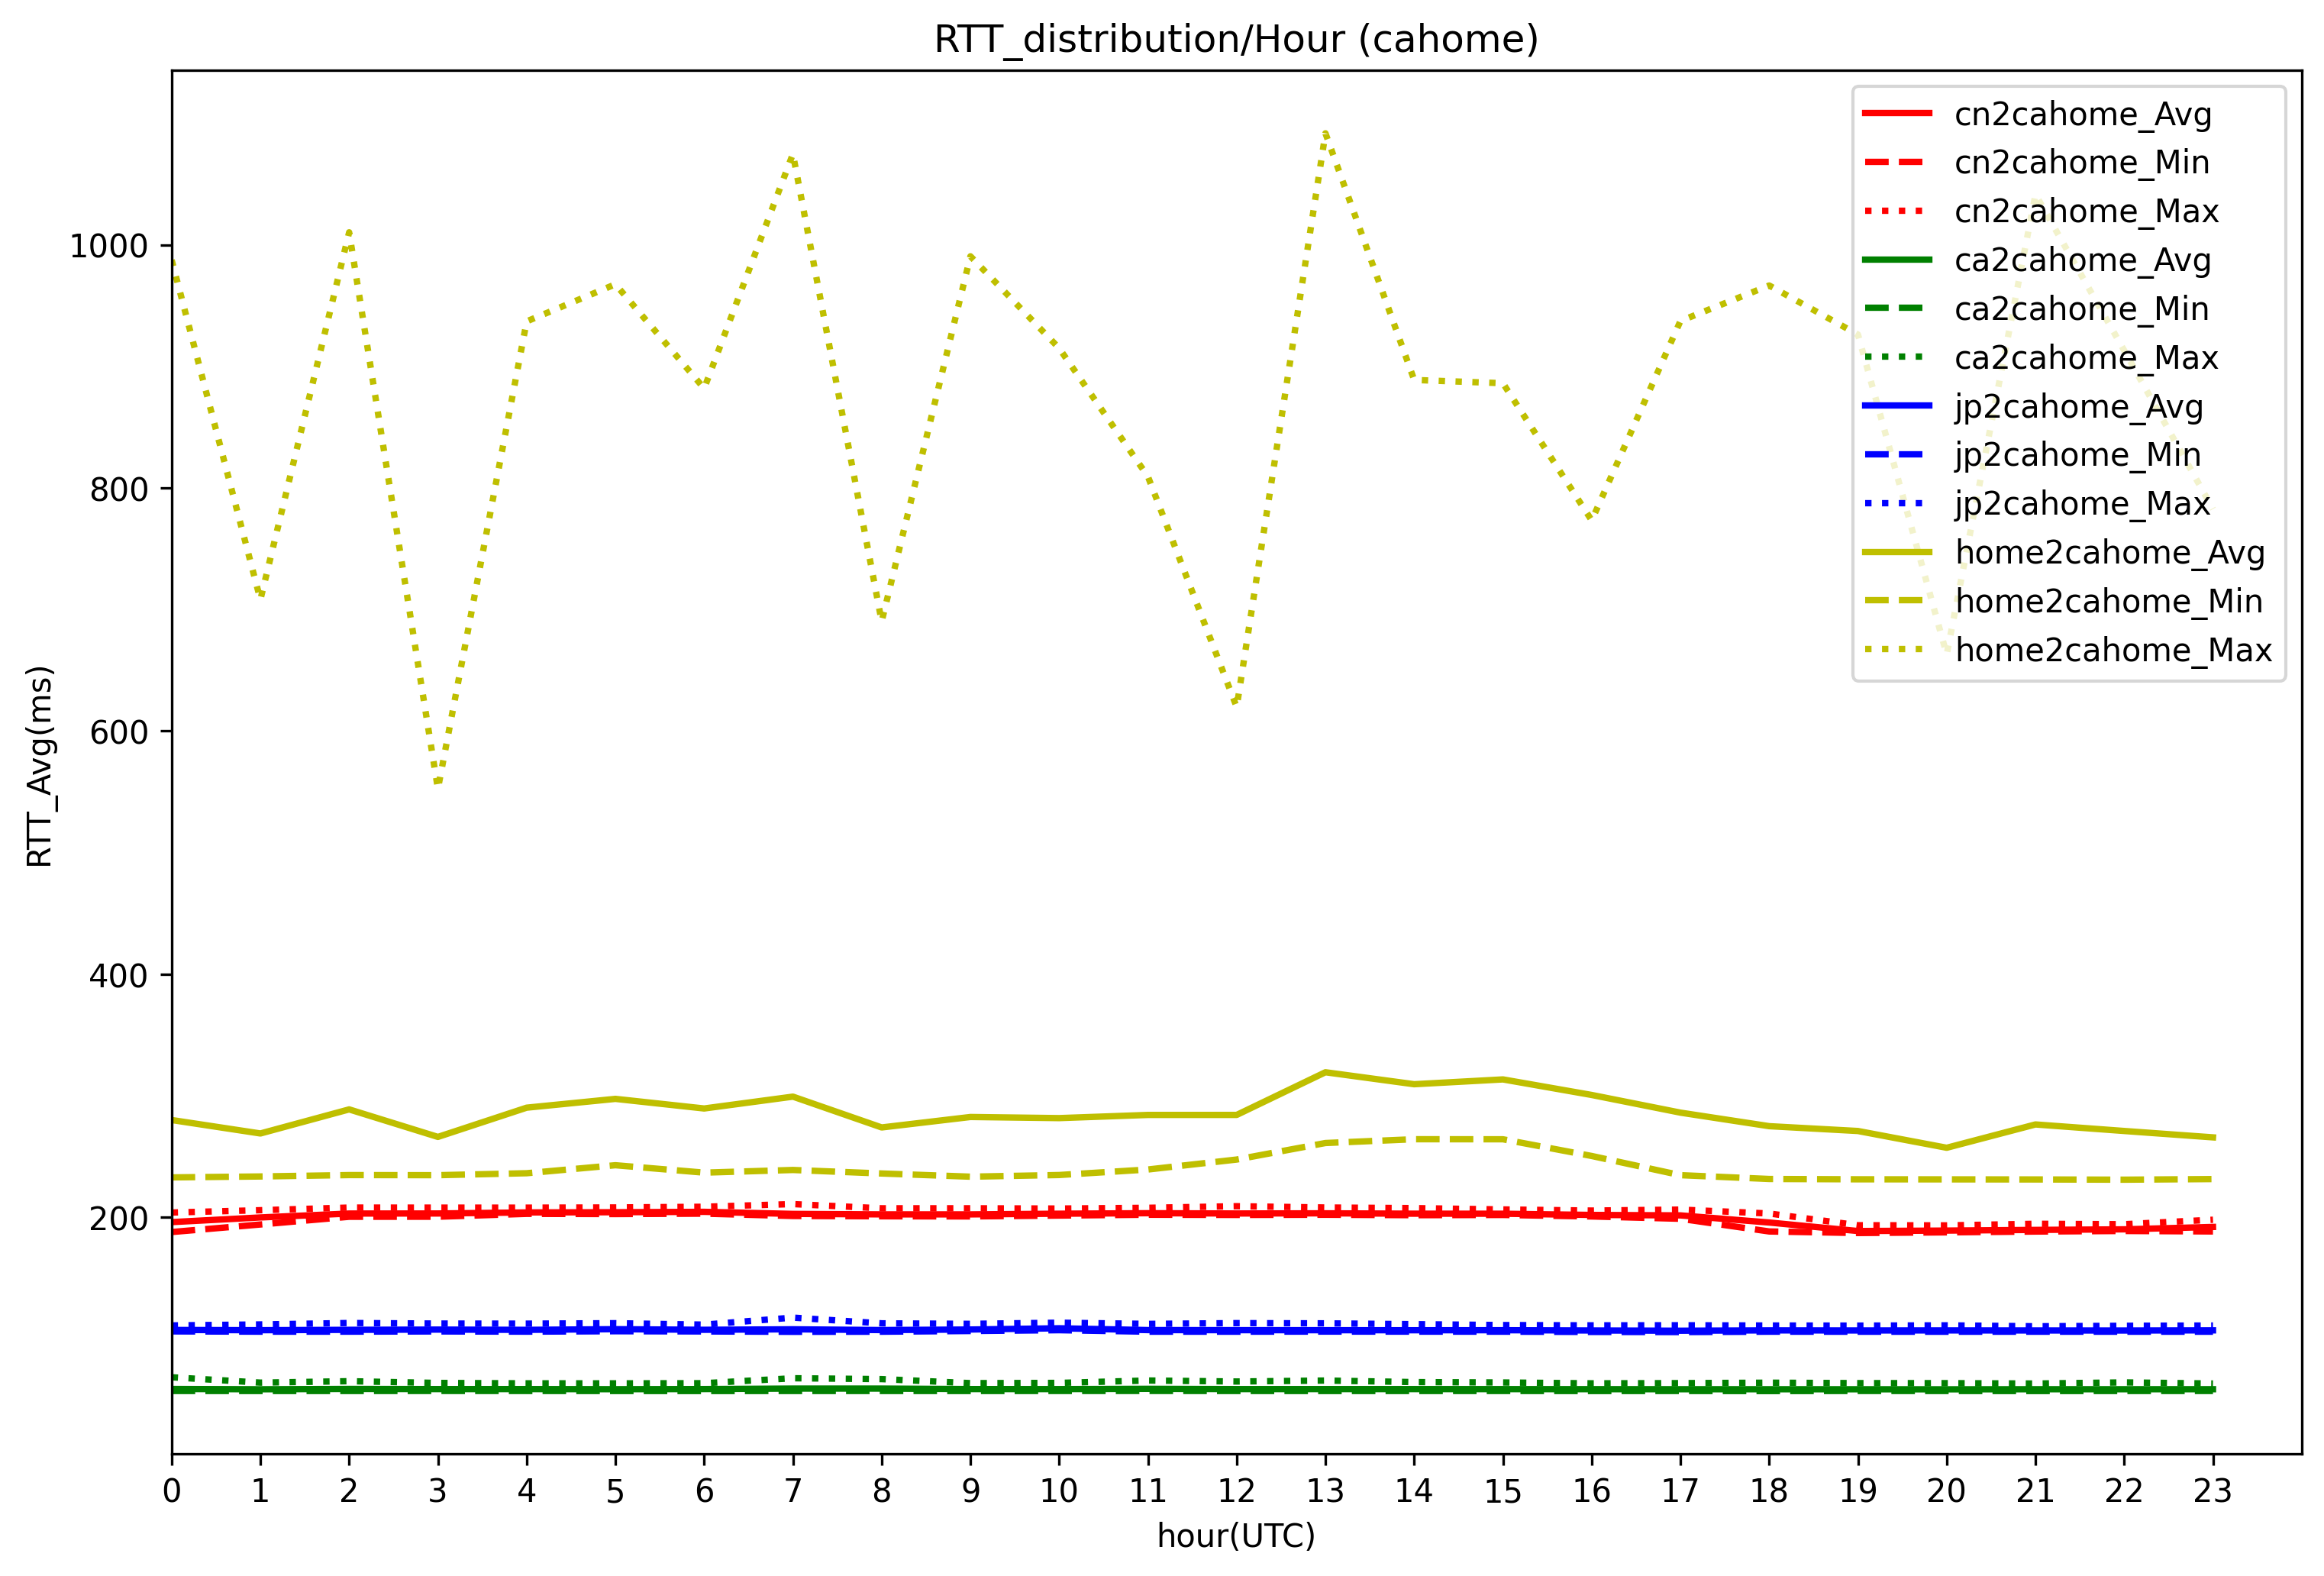

<Figure size 432x288 with 0 Axes>

In [12]:
cs=['r','g','b','y']
lss=['--','-',':']
fig = plt.figure(figsize=(12, 8), dpi=300)
j=-1
for i in [0,4,5,9]:
    j+=1
    plt.plot(hours,hour_avg[i], label=columns_name_p2p[i]+'_Avg',c=cs[j],ls=lss[1],lw=2)
    plt.plot(hours,hour_min[i], label=columns_name_p2p[i]+'_Min',c=cs[j],ls=lss[0],lw=2)
    plt.plot(hours,hour_max[i], label=columns_name_p2p[i]+'_Max',c=cs[j],ls=lss[2],lw=2)
plt.legend(loc=1)
plt.xlim((0, 24))
plt.xticks(range(24))
plt.xlabel('hour(UTC)')
plt.ylabel('RTT_Avg(ms)')
plt.title('RTT_distribution/Hour (cahome)')
plt.show()
plt.savefig('RTT_distribution_Hour (cahome).png')

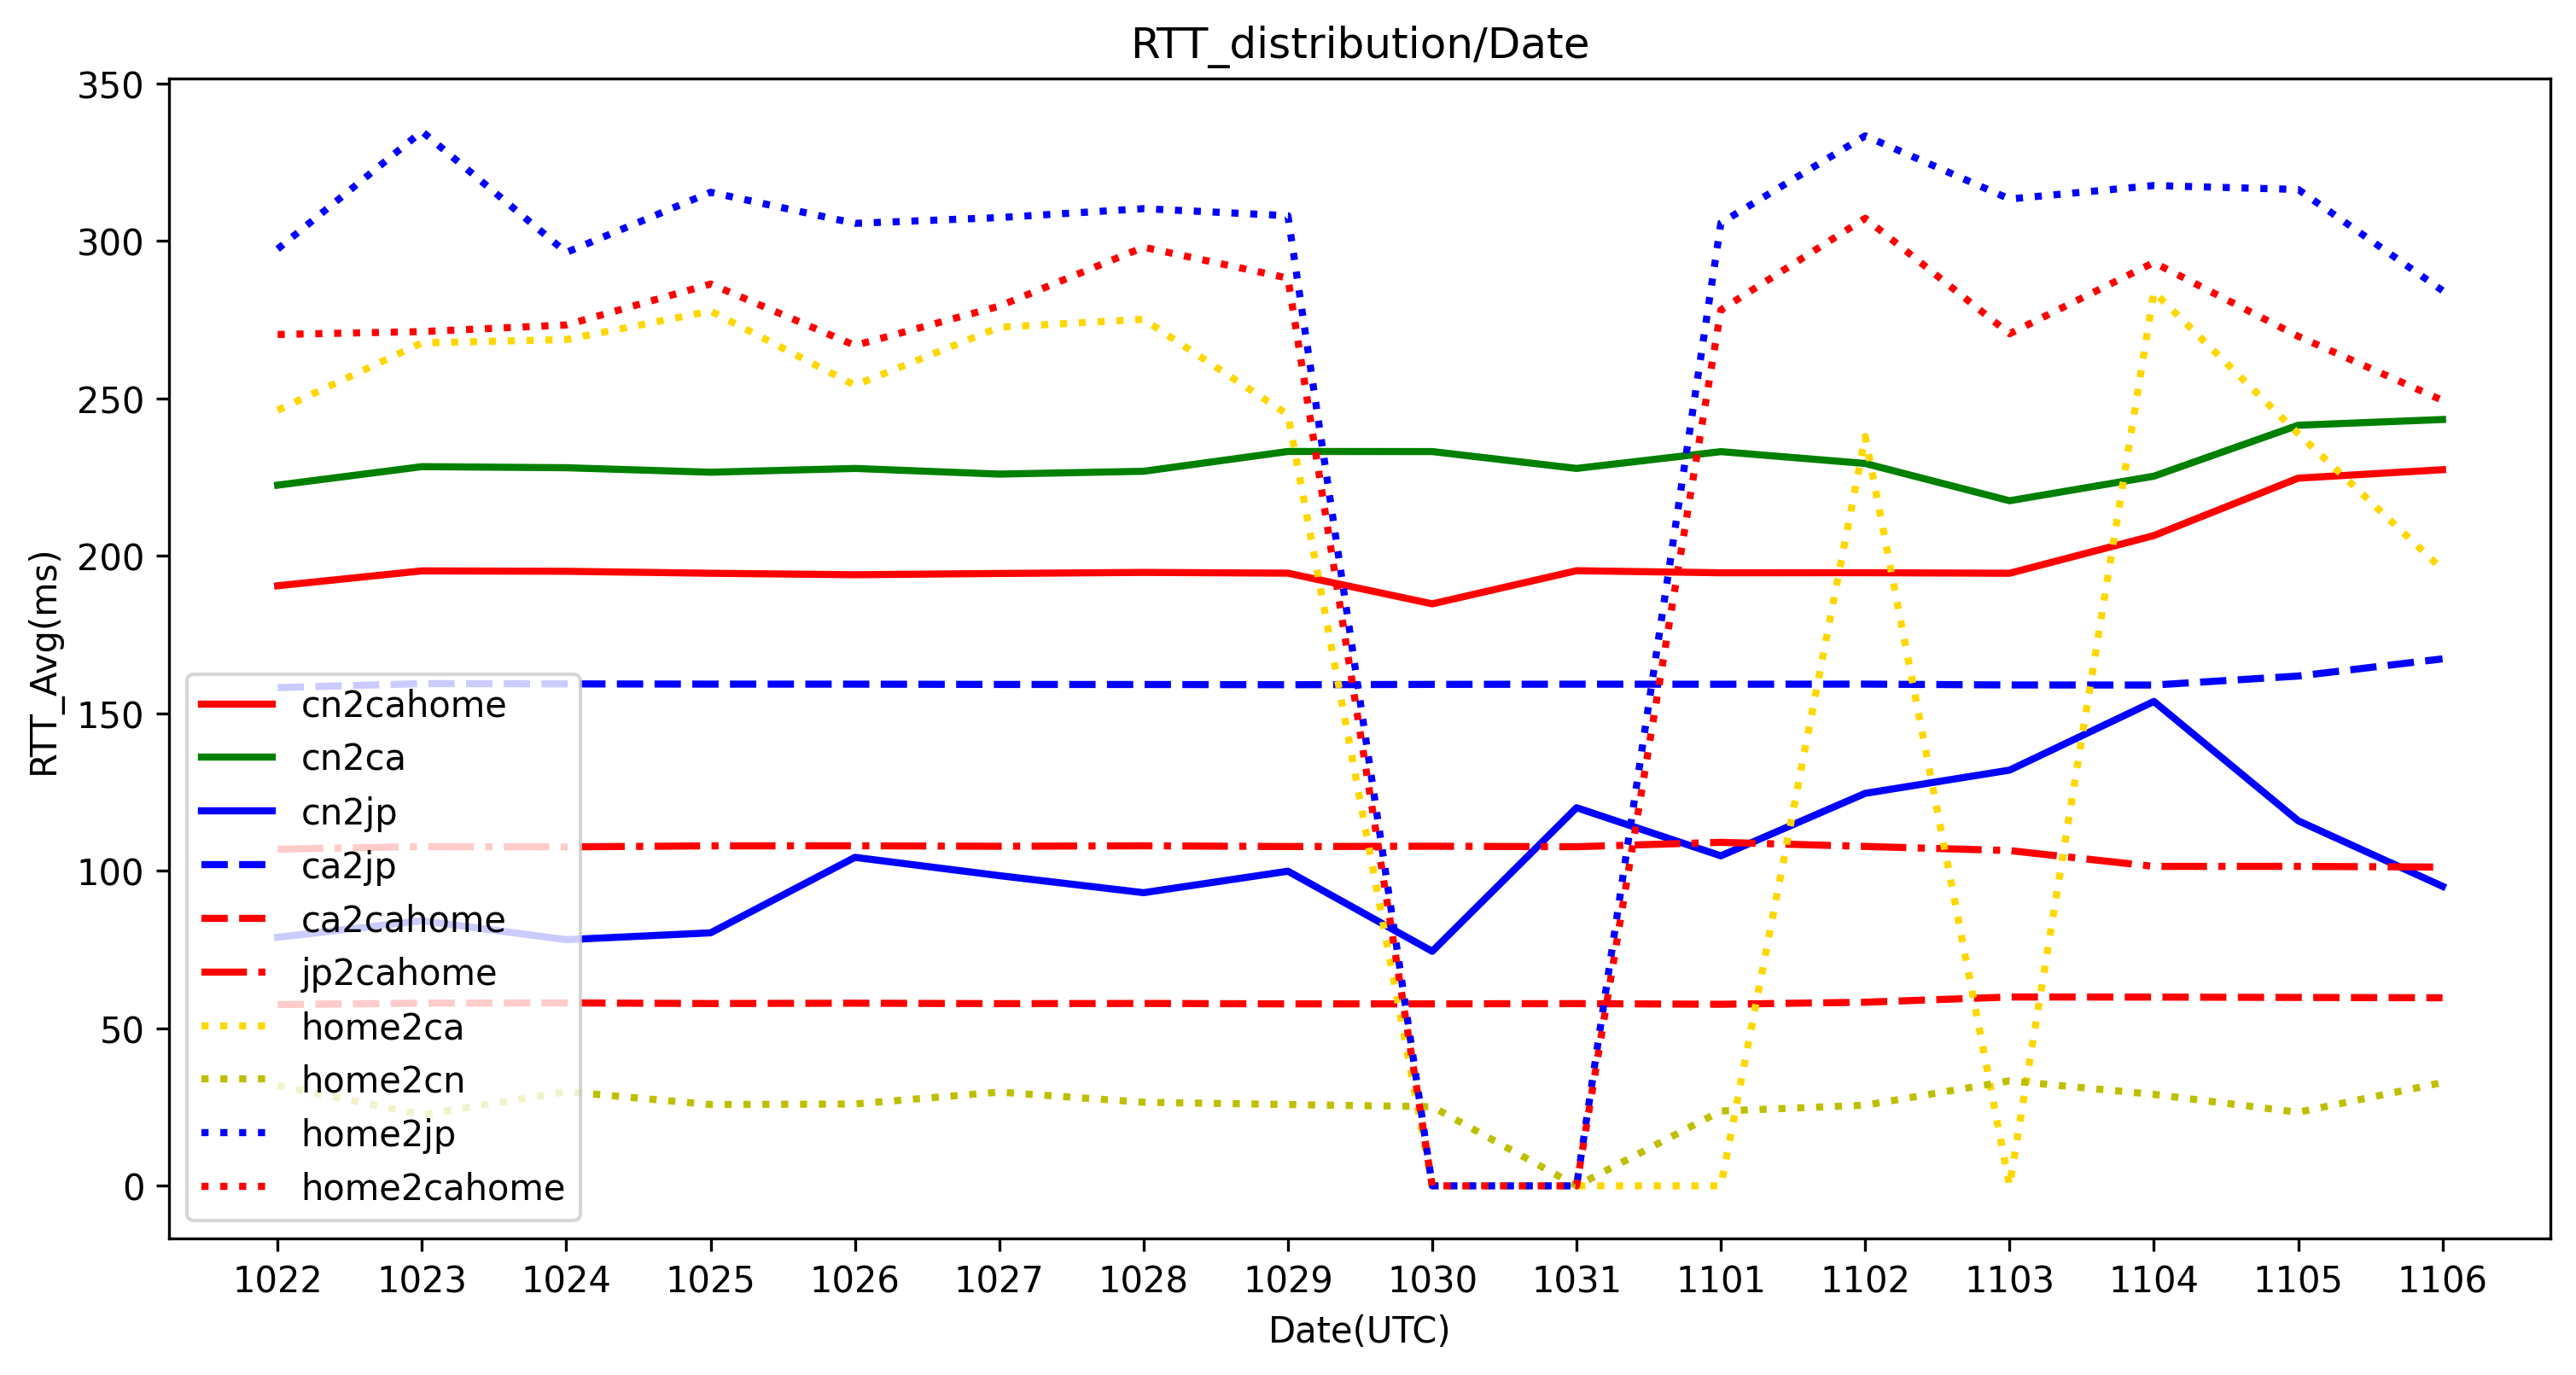

<Figure size 432x288 with 0 Axes>

In [13]:
cs=['r','g','b','b','r','r','#FFD700','y','b','r']
lss=['-','-','-','--','--','-.',':',':',':',':']
fig = plt.figure(figsize=(12, 6), dpi=300)
for i in range(len(columns_name_p2p)):
    plt.plot(dates,date_avg[i], label=columns_name_p2p[i],c=cs[i],ls=lss[i],lw=2)
plt.legend(loc=3)
plt.xticks(dates)
plt.xlabel('Date(UTC)')
plt.ylabel('RTT_Avg(ms)')
plt.title('RTT_distribution/Date')
plt.show()
plt.savefig('RTT_distribution_Date.png')